In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# line graph

In [2]:
damage_report = pd.read_csv("hw05-data/Damage Reports/mc1-reports-data.csv",low_memory=False)
damage_report

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
0,2020-04-08 17:50:00,10.0,6.0,10.0,3.0,8.0,NaN,1
1,2020-04-09 13:50:00,2.0,10.0,0.0,8.0,4.0,0.0,1
2,2020-04-09 00:20:00,7.0,10.0,10.0,9.0,10.0,0.0,1
3,2020-04-08 17:25:00,1.0,1.0,2.0,10.0,7.0,NaN,1
4,2020-04-08 02:50:00,9.0,7.0,1.0,6.0,9.0,NaN,1
...,...,...,...,...,...,...,...,...
83065,2020-04-10 02:30:00,9.0,10.0,10.0,NaN,7.0,2.0,8
83066,2020-04-10 02:30:00,8.0,10.0,10.0,NaN,7.0,1.0,8
83067,2020-04-09 16:45:00,10.0,9.0,10.0,NaN,8.0,1.0,8
83068,2020-04-09 16:55:00,8.0,8.0,9.0,NaN,7.0,0.0,8


In [3]:
damage_report['time'] = pd.to_datetime(damage_report['time'])

In [4]:
damage_report_sorted = damage_report.sort_values(by='time') #sort df based on time
damage_report_sorted.set_index('time', inplace=True) # set time back to index
damage_report_sorted

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
time,,,,,,,
2020-04-06,2.0,4.0,1.0,NaN,4.0,NaN,17
2020-04-06,2.0,8.0,5.0,NaN,3.0,0.0,2
2020-04-06,9.0,7.0,5.0,NaN,4.0,NaN,8
2020-04-06,10.0,2.0,9.0,NaN,10.0,NaN,4
2020-04-06,6.0,2.0,9.0,NaN,4.0,1.0,15
...,...,...,...,...,...,...,...
2020-04-11,7.0,7.0,8.0,10.0,10.0,NaN,6
2020-04-11,5.0,2.0,2.0,NaN,8.0,NaN,2
2020-04-11,5.0,1.0,3.0,NaN,2.0,NaN,15


In [5]:
# Aggregate by time, location, and geometry, calculating the mean while ignoring NaN values
damage_report_sorted_resampled = damage_report_sorted.resample('10min').mean().reset_index()
damage_report_sorted_resampled

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
0,2020-04-06 00:00:00,6.350000,4.700000,5.350000,7.000000,5.450000,0.333333,9.250000
1,2020-04-06 00:10:00,4.611111,5.722222,5.111111,6.142857,5.777778,0.600000,7.666667
2,2020-04-06 00:20:00,3.833333,4.083333,5.750000,5.166667,4.416667,NaN,9.583333
3,2020-04-06 00:30:00,5.700000,5.800000,4.900000,5.750000,3.900000,1.000000,7.800000
4,2020-04-06 00:40:00,6.714286,4.928571,4.357143,4.125000,4.285714,0.666667,5.571429
...,...,...,...,...,...,...,...,...
716,2020-04-10 23:20:00,4.772727,4.772727,4.590909,4.583333,6.409091,0.500000,10.636364
717,2020-04-10 23:30:00,5.555556,5.000000,3.555556,5.555556,4.888889,0.500000,8.944444
718,2020-04-10 23:40:00,6.000000,5.400000,4.800000,1.800000,5.800000,0.500000,7.900000
719,2020-04-10 23:50:00,5.692308,4.923077,5.230769,6.333333,5.076923,1.000000,9.846154


In [6]:
# Aggregate by time, location, and geometry, calculating the mean while ignoring NaN values
damage_report_sorted_aggregated = damage_report_sorted.groupby(['time', 'location']).agg({
    'sewer_and_water': lambda x: x.mean(skipna=True),
    'power': lambda x: x.mean(skipna=True),
    'roads_and_bridges': lambda x: x.mean(skipna=True),
    'medical': lambda x: x.mean(skipna=True),
    'buildings': lambda x: x.mean(skipna=True),
    'shake_intensity': lambda x: x.mean(skipna=True)
}).reset_index()
damage_report_sorted_aggregated

,time,location,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity
0,2020-04-06,2,2.0,8.0,5.0,NaN,3.0,0.0
1,2020-04-06,3,6.0,3.0,10.0,10.0,9.0,NaN
2,2020-04-06,4,9.0,1.5,9.5,NaN,6.5,1.0
3,2020-04-06,8,9.0,7.0,5.0,NaN,4.0,NaN
4,2020-04-06,15,6.0,2.0,9.0,NaN,4.0,1.0
...,...,...,...,...,...,...,...,...
10284,2020-04-11,2,6.0,1.5,5.0,NaN,4.5,0.0
10285,2020-04-11,6,7.0,7.0,8.0,10.0,10.0,NaN
10286,2020-04-11,13,4.0,9.0,7.0,NaN,7.0,NaN
10287,2020-04-11,15,5.0,1.0,3.0,NaN,2.0,NaN


In [7]:
# Draw visualization of the infrastructure damage trend over time

# Convert DataFrame to long format
damage_report_sorted_resampled_long = pd.melt(damage_report_sorted_resampled, id_vars=['time', 'location'], 
                  value_vars=['sewer_and_water', 'power', 'roads_and_bridges', 'medical', 'buildings', 'shake_intensity'],
                  var_name='Infrastructure', value_name='Value')

# Plot the line chart
fig = px.line(damage_report_sorted_resampled_long, x='time', y='Value', color='Infrastructure', title="Infrastructure Changes (Averaged) Over Time",
              labels={'time': 'Time', 'Value': 'Infrastructure Value'})

# Set initial x-axis rang
fig.update_xaxes(range=[damage_report_sorted_resampled['time'].min(), damage_report_sorted_resampled['time'].min() + pd.DateOffset(days=5)])  # Example zoom to first 6 months

# Enable drag-to-zoom and add a range slider
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="date"))

fig.show()

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [8]:
# Draw visualization of the infrastructure damage of individual location trend over time -- NOT used

damage_report_sorted_aggregated_long = pd.melt(damage_report_sorted_aggregated, id_vars=['time', 'location'], 
                  value_vars=['sewer_and_water', 'power', 'roads_and_bridges', 'medical', 'buildings', 'shake_intensity'],
                  var_name='Infrastructure', value_name='Value')

locations = damage_report_sorted_aggregated_long['location'].unique()

# Create the figure with traces for each location, set to be hidden by default
fig = go.Figure()

for loc in locations:
    filtered_data = damage_report_sorted_aggregated_long[damage_report_sorted_aggregated_long['location'] == loc]
    visible_status = True if loc == locations[0] else 'legendonly'  # Show only the first location by default
    for infrastructure in filtered_data['Infrastructure'].unique():
        infrastructure_data = filtered_data[filtered_data['Infrastructure'] == infrastructure]
        fig.add_trace(go.Scatter(
            x=infrastructure_data['time'], 
            y=infrastructure_data['Value'], 
            mode='lines',
            name=f"{infrastructure} - Location {loc}",
            visible=visible_status
        ))

# Create dropdown buttons to toggle visibility
dropdown_buttons = []
for i, loc in enumerate(locations):
    visibility = ['legendonly'] * len(locations) * len(filtered_data['Infrastructure'].unique())
    start_index = i * len(filtered_data['Infrastructure'].unique())
    for j in range(len(filtered_data['Infrastructure'].unique())):
        visibility[start_index + j] = True

    button = dict(
        method="update",
        label=f"Location {loc}",
        args=[{"visible": visibility}, {"title": f"Infrastructure Changes Over Time for Individual Locations {loc}"}]
    )
    dropdown_buttons.append(button)

# Update layout with the dropdown
fig.update_layout(
    updatemenus=[
        {
            "buttons": dropdown_buttons,
            "direction": "down",
            "showactive": True,
        }
    ],
    xaxis_title="Time",
    yaxis_title="Infrastructure Value",
    title="Infrastructure Changes Over Time"
)

# Enable drag-to-zoom and add a range slider
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="date"))

fig.show()

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



# map

In [9]:
# read data
damage_report = pd.read_csv("hw05-data/Damage Reports/mc1-reports-data.csv",low_memory=False)
sth_neighborhood = gpd.read_file( "hw05-data/Sensor Data and Maps/StHimarkNeighborhoodShapefiles/StHimark.shp")

# merg two datasets together
sth_neighborhood = sth_neighborhood.rename(columns={"Id": "location"})
combined_data = damage_report.merge(sth_neighborhood[['location', 'geometry','Nbrhood']], how='left')

# convert time to datetime and sort into ascending order
combined_data['time'] = pd.to_datetime(combined_data['time'])
combined_data = combined_data.sort_values(by='time')


In [10]:
# extract only month-day to calculate means
combined_data['month_day'] = combined_data['time'].dt.strftime('%m-%d')
combined_data = combined_data.drop(columns=['time'])

# Group by month_day and location and calculate the average for other columns
combined_data_mean = combined_data.groupby(['month_day', 'location', 'geometry','Nbrhood']).agg('mean').reset_index()

# Create a dictionary to store the separated DataFrames
separated_dfs = {}

# Iterate over unique month_day values and create separate DataFrames
for month_day in combined_data_mean['month_day'].unique():
    # Filter the DataFrame for each unique month_day
    month_day_df = combined_data_mean[combined_data_mean['month_day'] == month_day].copy()
    
    # Convert to GeoDataFrame
    separated_dfs[month_day] = gpd.GeoDataFrame(month_day_df, geometry='geometry')

# Now all dataframes in `separated_dfs` will be GeoDataFrames with 'geometry' as the geometry column


In [11]:
# define a function that takes the dataframe and create the plot
def plot_data_by_variable(date, variable):
    """
    Plot the specified variable for a given GeoDataFrame.

    Parameters:
    data (GeoDataFrame): The data subset for a specific month_day.
    variable (str): The column name to be used for shading in the plot.
    """
    # Create a new figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Plotting with GeoPandas
    separated_dfs[date].plot(
        column=variable,       # The column chosen by the user for shading
        cmap='viridis_r', 
        linewidth=0.8, 
        ax=ax, 
        edgecolor='0.8', 
        legend=True,
        vmin=0,                # Set the minimum value for the color scale
        vmax=10,               # Set the maximum value for the color scale
        legend_kwds={'label': "Damage Level (0-10)", 'orientation': 'horizontal'} # Set the legend title
    )

    # Add labels for each polygon using the 'Nbrhood' and the variable value
    for idx, row in separated_dfs[date].iterrows():
        # Extract the coordinates of the polygon's centroid for label placement
        x, y = row['geometry'].centroid.coords[0]
        
        # Format the label with Nbrhood and the variable value
        label_text = f"{row['Nbrhood']}\n{row[variable]:.2f}"  # Label format: 'Nbrhood' and variable value rounded to 2 decimal places
        
        # Place the label in the plot
        ax.text(x, y, label_text, fontsize=10, ha='center', color='white', fontweight='bold')

    # Set title and labels
    ax.set_title(f"StHimark Neighborhood Damage Level for {variable} on {date}", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)
    
    # Show the plot
    plt.show()


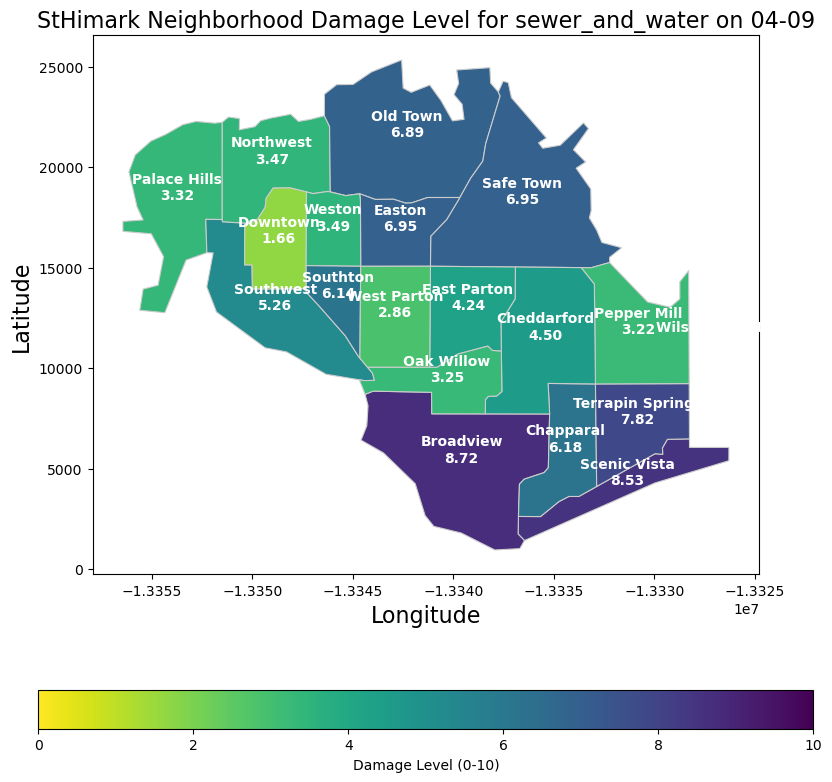

In [12]:
# plot for sewer_and_water:
plot_data_by_variable('04-09', 'sewer_and_water')

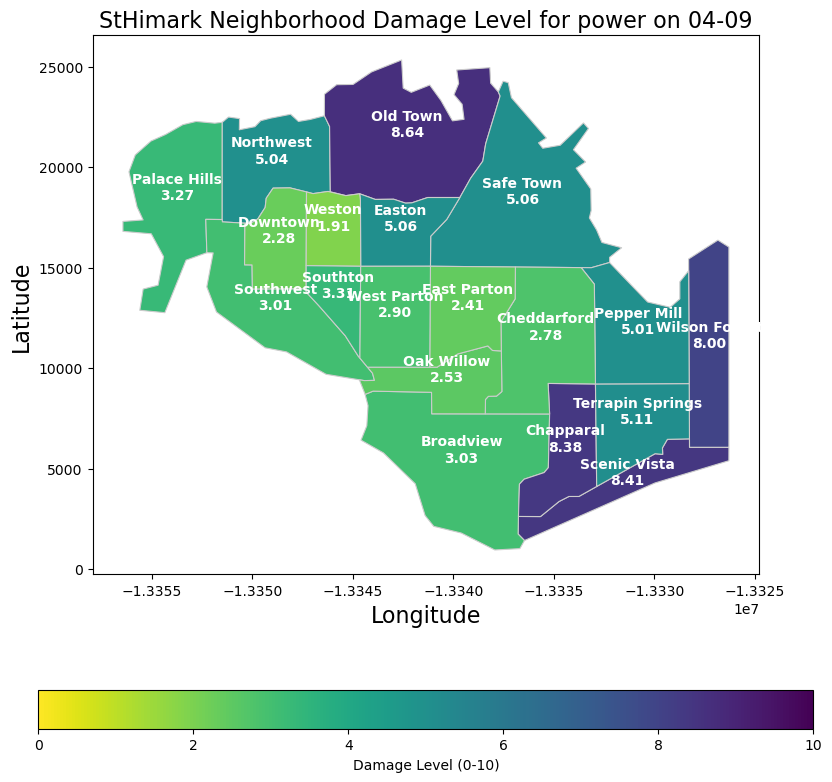

In [13]:
# plot for power:
plot_data_by_variable('04-09', 'power')